In [57]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
%matplotlib inline

In [58]:
def lorenz(state, sigma=10, rho=28, beta=2.667):

    x, y, z = state
    x_dot   = sigma*(y - x)
    y_dot   = rho*x - y - x*z
    z_dot   = x*y - beta*z

    return [x_dot, y_dot, z_dot]

def rk4_step(func, state, dt, *params):
    """Runge-Kutta 4th order step"""

    k1 = dt * np.array(func(state, *params))
    k2 = dt * np.array(func(state + 0.5 * k1, *params))
    k3 = dt * np.array(func(state + 0.5 * k2, *params))
    k4 = dt * np.array(func(state + k3, *params))

    return state + (k1 + 2 * k2 + 2 * k3 + k4) / 6

#### Genreate Data

In [77]:
# Time Paramter
dt      = 0.01
N_steps = 6000
t       = np.arange(0, N_steps*dt, dt)

# Initial conditions and trajectory
state           = np.array([1.0, 1.0, 1.0])
trajectory      = np.zeros((N_steps,3))
trajectory[0]   = state

# Lorenz system parameters
sigma = 10.0
rho = 28.0
beta = 8.0 / 3.0

for i in range(1, N_steps):
    state           = rk4_step(lorenz, state, dt, sigma, rho, beta)
    trajectory[i]   = state

start_value = 1000
t           = t[start_value:]
x, y, z     = trajectory[start_value:,0], trajectory[start_value:,1], trajectory[start_value:,2]

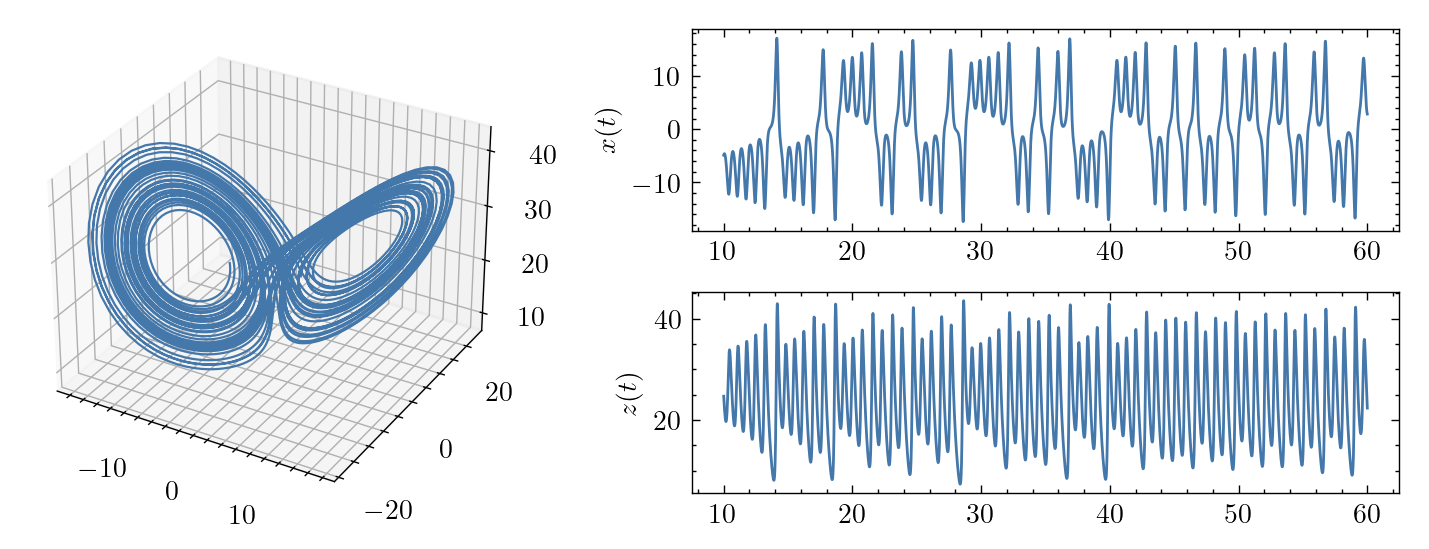

In [78]:
with plt.style.context(["science","bright"]):

    fig = plt.figure(dpi=200, layout='constrained')
    fig.set_figwidth(fig.get_figwidth()*2.2)

    ax  = fig.add_subplot(1,2,1, projection='3d')
    ax.plot(x, y, z, lw=0.8)
    # ax.set_xlabel('$x(t)$')
    # ax.set_ylabel('$y(t)$')
    # ax.set_zlabel('$z(t)$')

    # ax.grid(False)
    # ax.axis('off')

    ax  = fig.add_subplot(2,2,2)
    ax.plot(t, x)
    ax.set_ylabel('$x(t)$')

    ax  = fig.add_subplot(2,2,4)
    ax.plot(t, z)
    ax.set_ylabel('$z(t)$')
    

In [79]:
np.savetxt(X=x, fname='x_vals.csv')
np.savetxt(X=z, fname='z_vals.csv')